# Calibração de ruído

Rode a célula abaixo e selecione os pontos nos ratos corrigindo o ruído.

Loading sample frames: 100%|██████████| 100/100 [00:02<00:00, 37.56it/s]


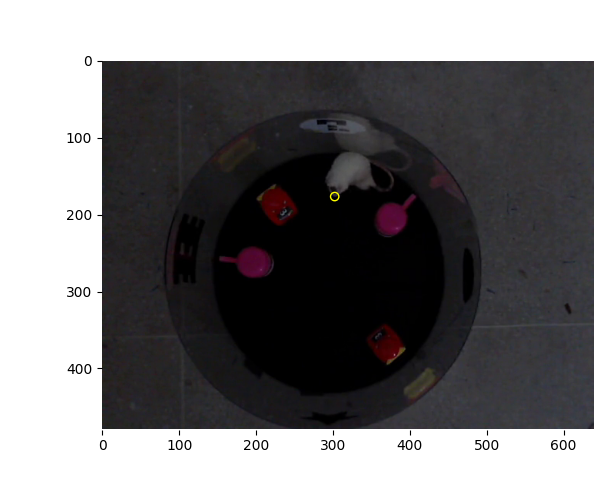

In [ ]:
import keypoint_moseq as kpms # type: ignore
from utils.video_frame_indexes import get_video_frame_indexes

project_name = 'elm_ms_reduced'
project_dir = f'projects/{project_name}'

config = kpms.load_config(project_dir)
coordinates, confidences, bodyparts = kpms.load_keypoints(
    config["video_dir"], "deeplabcut", extension=".csv"
)
coordinates, confidences, video_frame_indexes = get_video_frame_indexes(coordinates, confidences)

%matplotlib widget
kpms.noise_calibration(project_dir, coordinates, confidences, video_frame_indexes=video_frame_indexes, **config)
